In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [139]:
df = pd.read_csv('./Airline_Delay_Cause.csv')

In [186]:
df.head()

#******* NOTE: WE DON'T HAVE ENOUGH DATA TO MAKE GOOD PREDICTIONS AND DATA SHOULDN'T BE SAMPLED WITH_REPLACEMENT 
#*******IN THIS CASEGIVEN THAT IT LEADS TO OVERFITTING/ UNDERFITTING. 

#Granularity of the dataset: each row represents a month and flight that has been delayed. 

# arrdel15: total number of delayed flights in the observation

# carrier_ct : total number of delays due to the carrier

#weather total number of delayes due to weather. 

#security_ct: total number of delats due to security. 


df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'security_ct', 'on_time'],
      dtype='object')

In [141]:
df = df.loc[:, ['year', 'month', 'carrier', 'carrier_name', 'airport', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'security_ct']]

df['on_time'] = df['arr_flights'] - df['arr_del15']



In [142]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,security_ct,on_time
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,2016.120000,6.560000,1426.368000,372.27600,66.070240,11.868080,0.505360,1054.092000
std,0.712482,3.401866,1352.969342,353.49884,64.543252,15.057421,0.961071,1044.329082
min,2015.000000,1.000000,56.000000,4.00000,2.000000,0.000000,0.000000,37.000000
25%,2016.000000,4.000000,461.750000,97.75000,16.455000,1.130000,0.000000,328.000000
50%,2016.000000,7.000000,1173.500000,257.00000,50.950000,6.770000,0.000000,831.500000
75%,2017.000000,9.000000,1710.000000,528.50000,82.220000,15.992500,0.725000,1232.000000
max,2017.000000,12.000000,6027.000000,1616.00000,353.010000,86.750000,5.750000,4438.000000


In [143]:
df['year'].value_counts()

2016    120
2017     80
2015     50
Name: year, dtype: int64

In [144]:
df['carrier_name'].str.extract(r'([a-zA-z]*) ').isna().any()

0    False
dtype: bool

In [145]:
df['carrier_name'].str.extract(r'([a-zA-z]*) ').value_counts()

Alaska       25
American     25
Delta        25
Frontier     25
Hawaiian     25
JetBlue      25
SkyWest      25
Southwest    25
United       25
Virgin       25
dtype: int64

In [146]:
df['carrier_name'] = df['carrier_name'].str.extract(r'([a-zA-z]*) ')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'JetBlue'),
  Text(1, 0, 'Delta'),
  Text(2, 0, 'Frontier'),
  Text(3, 0, 'Hawaiian'),
  Text(4, 0, 'SkyWest'),
  Text(5, 0, 'United'),
  Text(6, 0, 'Virgin'),
  Text(7, 0, 'Southwest'),
  Text(8, 0, 'American'),
  Text(9, 0, 'Alaska')])

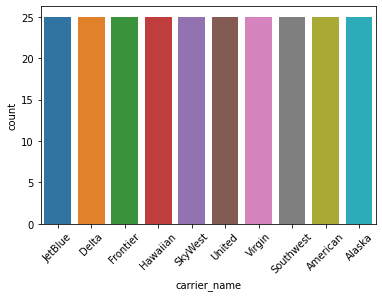

In [147]:
sns.countplot(x=df['carrier_name'])
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Carrier vs Delay Time in Minutes')

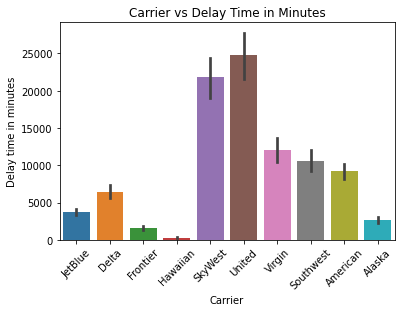

In [148]:
sns.barplot(x=df['carrier_name'], y = df['arr_del15'], estimator=sum)
# sns.barplot(x=df['carrier_name'], y = df['arr_del15'], estimator=np.mean)

plt.xticks(rotation=45)
plt.xlabel('Carrier')
plt.ylabel('Delay time in minutes')
plt.title('Carrier vs Delay Time in Minutes')


Text(0.5, 1.0, 'Carrier vs Average Delay time in minutes')

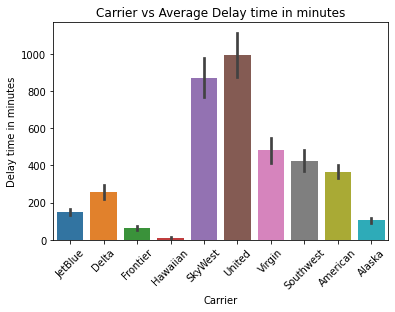

In [149]:
sns.barplot(x=df['carrier_name'], y = df['arr_del15'], estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel('Carrier')
plt.ylabel('Delay time in minutes')
plt.title('Carrier vs Average Delay time in minutes')

<AxesSubplot:xlabel='carrier_ct', ylabel='Count'>

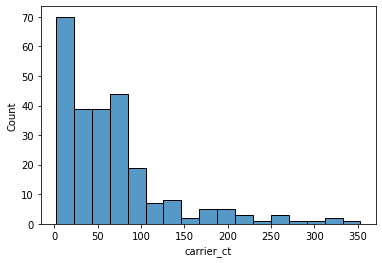

In [150]:
sns.histplot(x=df['carrier_ct'])

<AxesSubplot:xlabel='on_time', ylabel='Count'>

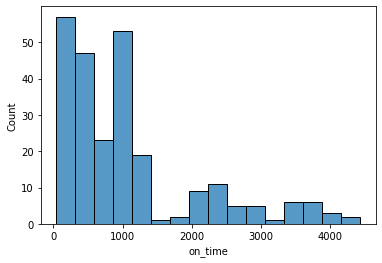

In [151]:
sns.histplot(x=df['on_time'])

<AxesSubplot:xlabel='arr_del15', ylabel='Count'>

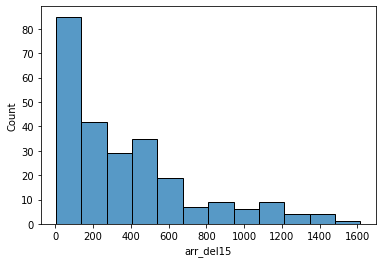

In [152]:
sns.histplot(x=df['arr_del15'])

In [153]:
# weather_delays_average = []
delays_average = []
on_time_average = []

for i in range(1000):
    sampled = df[df['carrier_name'] == 'United'].sample(15, replace=True)
    
    del_avg = np.mean(sampled['arr_del15'])
    on_time_avg = np.mean(sampled['on_time'])
    
    delays_average.append(del_avg)
    on_time_average.append(on_time_avg)

In [154]:
np.percentile(delays_average, 2.5)

839.12

In [155]:
print(np.percentile(delays_average, 2.5), np.percentile(delays_average, 97.5))


print(np.percentile(on_time_average, 2.5), np.percentile(on_time_average, 97.5))



839.12 1146.0216666666665
3226.3983333333335 3758.4583333333335


<AxesSubplot:xlabel='carrier_ct', ylabel='security_ct'>

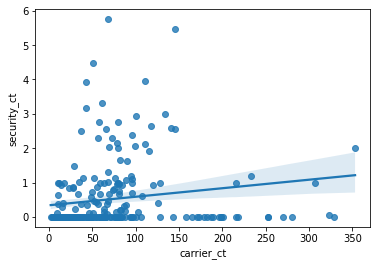

In [156]:
sns.regplot(x=df['carrier_ct'], y=df['security_ct']) #no correlation

In [157]:
df['carrier_name'].value_counts()

JetBlue      25
Delta        25
Frontier     25
Hawaiian     25
SkyWest      25
United       25
Virgin       25
Southwest    25
American     25
Alaska       25
Name: carrier_name, dtype: int64

In [158]:
df['carrier_name'] == 'Virgin'

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248     True
249    False
Name: carrier_name, Length: 250, dtype: bool

In [160]:
df = df[(df['carrier_name'] == "United") | (df['carrier_name'] == 'Virgin')]
carrier_names = np.array(df['carrier_name'].unique())
united_val = (carrier_names == 'United') + 0
map_values = dict(zip(carrier_names, united_val))

In [163]:
df['carrier_name'] = df['carrier_name'].map(map_values)

In [ ]:
df

In [164]:
df.head()

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,security_ct,on_time
5,2017,8,UA,1,SFO,6027.0,1616.0,233.25,48.00,1.19,4411.0
6,2017,8,VX,0,SFO,1906.0,797.0,95.60,14.82,0.71,1109.0
17,2017,7,UA,1,SFO,5372.0,934.0,216.07,36.36,0.00,4438.0
18,2017,7,VX,0,SFO,1886.0,493.0,65.44,11.04,2.56,1393.0
27,2017,6,UA,1,SFO,5118.0,1266.0,252.83,28.25,0.00,3852.0


In [166]:

Y = df['carrier_name']
X = pd.get_dummies(df)
X.drop(columns=['carrier_name'], inplace=True)


In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [178]:
# X_train.sample(100, replace=True)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,security_ct,on_time,carrier_UA,carrier_VX,airport_SFO
138,2016,7,1807.0,430.0,88.20,19.79,0.18,1377.0,0,1,1
127,2016,8,5441.0,1305.0,322.91,30.20,0.06,4136.0,1,0,1
38,2017,5,1802.0,723.0,88.52,10.09,1.08,1079.0,0,1,1
28,2017,6,1829.0,657.0,110.45,6.37,3.97,1172.0,0,1,1
87,2016,12,4398.0,1409.0,353.01,50.02,2.00,2989.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
90,2016,11,4373.0,670.0,187.13,6.66,0.00,3703.0,1,0,1
117,2016,9,4693.0,711.0,217.99,16.84,0.00,3982.0,1,0,1
90,2016,11,4373.0,670.0,187.13,6.66,0.00,3703.0,1,0,1
148,2016,6,1782.0,422.0,73.06,24.11,2.29,1360.0,0,1,1


In [179]:
# Note we don't have enough data and sampling leads will lead to overfitting the values on the training set hence i don't sample but the confusion matrix is built out below

clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [176]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print('Precision:', metrics.recall_score(Y_test, y_pred))
metrics.confusion_matrix(Y_test, y_pred)

Accuracy: 1.0
Precision: 1.0
Precision: 1.0


array([[9, 0],
       [0, 9]])

In [181]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

metrics.confusion_matrix(Y_test, y_pred)

array([[9, 0],
       [0, 9]])

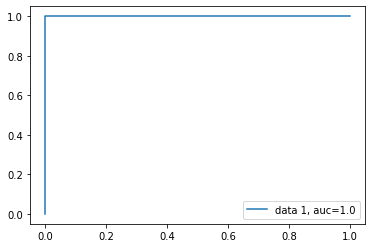

In [185]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()